In [187]:
## Convolutional Neural Network
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import v2


train_data = datasets.FashionMNIST(root="datas",
                                   download=True,
                                   train=True,
                                   transform=v2.PILToTensor()
                                   )


test_data = datasets.FashionMNIST(root="datas",
                                  download=True,
                                  train=False,
                                  transform=v2.PILToTensor()
                                  )
        

In [188]:
len(train_data), len(test_data)

(60000, 10000)

In [189]:
len(train_data.classes),  train_data[0][0].shape

(10, torch.Size([1, 28, 28]))

In [190]:
class FashinMnistV2(nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
               in_channels= input_shape,
               out_channels=hidden_unit,
               stride=1,
               padding=1,
               kernel_size=3
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      stride=1,
                      padding=1,
                      kernel_size=3
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
                 
        )
        
        self.conv_block_2 = nn.Sequential(
              nn.Conv2d(
               in_channels= hidden_unit,
               out_channels=hidden_unit,
               stride=1,
               padding=1,
               kernel_size=3
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      stride=1,
                      padding=1,
                      kernel_size=3
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7 ,   ## resolve this sachin????
                      out_features= output_shape)
            
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        print("Shape conv layer 1" , x.shape)
        x = self.conv_block_2(x)
        print("Shape conv layer 2" , x.shape)
        x = self.classifier(x)
        print("Shape classifier" , x.shape)

        
        return x


In [191]:
# Instatiate our model 

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
model_2 = FashinMnistV2(input_shape=1,
                        hidden_unit=10,
                        output_shape=len(train_data.classes)).to(device)



In [192]:
# creat an image tensor of batch 32 for testing

images = torch.rand(32,3,64,64)
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [193]:
# create a conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                            out_channels=64,
                            kernel_size=3,
                            stride=1,
                            padding=1)


image_after_conv_layer  = conv_layer(test_image)
image_after_conv_layer.shape

torch.Size([64, 64, 64])

In [194]:
# creat a maxpool layer
max_layer = nn.MaxPool2d(kernel_size=2)

max_layer(image_after_conv_layer).shape

torch.Size([64, 32, 32])

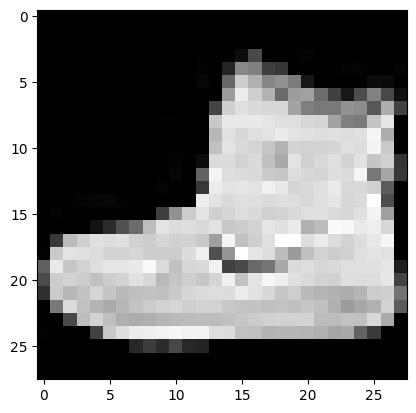

In [195]:
# get a fashion image
import matplotlib.pyplot as plt

image = train_data[0][0]

plt.imshow(image.squeeze(), cmap="gray")

In [196]:
image = image.type(torch.float)

In [197]:
model_2(image.unsqueeze(dim=1))


Shape conv layer 1 torch.Size([1, 10, 14, 14])
Shape conv layer 2 torch.Size([1, 10, 7, 7])
Shape classifier torch.Size([1, 10])


tensor([[-0.4252, -3.6026,  2.8097, -3.6178,  2.5319, -2.1097, -0.9511,  3.2399,
         -4.4498,  0.2484]], grad_fn=<AddmmBackward0>)

In [198]:
torch.__version__

'2.6.0'

In [199]:
image.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [200]:
# Add loss and optimizer
from helper import  accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 
from tqdm.auto import tqdm
from train_eval_batch import train_step

start_time = timer()

epochs = 4

for epoch in tqdm(range(epochs)):
    print(f"Epochs : {epoch} \n----")
    
    train_step(model=model_2,
               data_loader=train_data)
    
    
    

